In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
from scipy.integrate import quad
from IPython.display import HTML

### BSM model

In [2]:
def dN(x):
    return math.exp(-0.5*x**2)/math.sqrt(2*math.pi)

def N(d):
    return quad(lambda x:dN(x),-20,d,limit=50)[0]

def d1f(St, K, t, T, r, sigma):
    d1 = (math.log(St / K) + (r + 0.5 * sigma ** 2) * (T - t)) / (sigma * math.sqrt(T - t))
    return d1

def BSM_call_value(St, K, t, T, r, sigma):
    d1=d1f(St,K,t,T,r,sigma)
    d2=d1-sigma*math.sqrt(T-t)
    call_value = St * N(d1) - math.exp(-r * (T - t)) * K * N(d2)
    return call_value

def BSM_put_value(St, K, t, T, r, sigma):
    put_value = BSM_call_value(St,K,t,T,r,sigma)-St + math.exp(-r * (T - t)) * K
    return put_value

### Greeks

In [3]:
table = """<table><tr><th>Greek</th><th>Call<pre>                           </pre></th><th>Put<pre>                           </pre></th></tr><tr><td>Delta $\Delta$</td><td>$N(d_1)$</td><td>$-N(-d_1)$</td></tr><tr><td>Theta $\Theta$</td><td>$\\frac{-\sigma SN'(d_1)}{2\sqrt{T-t}} - rKe^{-r(T-t)} N(d_2)$</td><td>$\\frac{-\sigma SN'(d_1)}{2\sqrt{T-t}} + rKe^{-r(T-t)} N(d_2)$</td></tr><tr><td>Gamma $\Gamma$</td><td>$\\frac{N'(d_1)}{S\sigma \sqrt{T}}$</td><td>$\\frac{N'(d_1)}{S\sigma \sqrt{T}}$</td></tr><tr><td>Vega $v$</td><td>$S_0 N'(d_1)\sqrt{T}$</td><td>$S_0 N'(d_1)\sqrt{T}$</td></tr><tr><td>Rho $\\rho$</td><td>$TKe^{-r(T)} N(d_2)$</td><td>$-TKe^{-r(T)} N(-d_2)$</td></tr></table>"""
HTML(table)

Greek,Call,Put
Delta $\Delta$,$N(d_1)$,$-N(-d_1)$
Theta $\Theta$,$\frac{-\sigma SN'(d_1)}{2\sqrt{T-t}} - rKe^{-r(T-t)} N(d_2)$,$\frac{-\sigma SN'(d_1)}{2\sqrt{T-t}} + rKe^{-r(T-t)} N(d_2)$
Gamma $\Gamma$,$\frac{N'(d_1)}{S\sigma \sqrt{T}}$,$\frac{N'(d_1)}{S\sigma \sqrt{T}}$
Vega $v$,$S_0 N'(d_1)\sqrt{T}$,$S_0 N'(d_1)\sqrt{T}$
Rho $\rho$,$TKe^{-r(T)} N(d_2)$,$-TKe^{-r(T)} N(-d_2)$


In [18]:
def BSM_delta (St, K, t, T, r, sigma):
    d1=d1f(St, K, t, T, r, sigma)
    delta=N(d1)
    return delta

def BSM_gamma(St, K, t, T, r, sigma):
    d1=d1f(St, K, t, T, r, sigma)
    gamma=dN(d1) / (St * sigma*math.sqrt(T-t))
    return gamma

def BSM_theta(St, K, t, T, r,sigma):
    d1 = d1f(St, K, t, T, r, sigma)
    d2 = d1 - sigma * math.sqrt(T - t)
    theta = -(St * dN(d1) * sigma / (2 * math.sqrt(T - t))
              + r * K * math.exp(-r * (T - t)) * N(d2))
    return theta

def BSM_rho(St, K, t, T, r, sigma):
    d1 = d1f(St, K, t, T, r, sigma)
    d2 = d1 - sigma * math.sqrt(T - t)
    rho = K * (T - t) * math.exp(-r * (T - t)) * N(d2)
    return rho

def BSM_vega(St, K, t, T, r, sigma):
    d1 = d1f(St, K, t, T, r, sigma)
    vega = St * dN(d1) * math.sqrt(T - t)
    return vega

def BSM_vanna(St, K, t, T, r, sigma):
    d1 = d1f(St, K, t, T, r, sigma)
    d2 = d1 - sigma * math.sqrt(T - t)
    return dN(d1) * (-d2) / sigma

### Plot

In [61]:
def plot_greeks(function, greek, K_=False, S_=True):

    # model parameters
    St = 100.0  # index level
    K = 100.0  # option strike
    t = 0.0  # valuation date
    T = 1.0  # maturity date
    r = 0.05  # risk-less short rate
    sigma = 0.2  # volatility

    # Greek Calculations
    tlist = np.linspace(0.01, 1, 100)
    slist = np.linspace(80, 120, 100) if S_ else np.ones(100) * St
    klist = np.linspace(80, 120, 100) if K_ else np.ones(100) * K
    V = np.zeros((len(tlist), len(slist)), dtype=np.float)
    for j in range(len(slist)):
        for i in range(len(tlist)):
            V[i, j] = function(slist[j], klist[j], t, tlist[i], r, sigma)

    # 3D Plotting
    x, y = np.meshgrid(slist if S_ else klist, tlist)
    fig = plt.figure(figsize=(9, 5))
    plot = Axes3D(fig)
    plot.plot_surface(x, y, V, cmap=plt.get_cmap('bone'))
    plot.set_xlabel('stock $S$' if S_ else 'strile $K$')
    plot.set_ylabel('maturity $T$')
    plot.set_zlabel('%s(K, T)' % greek)

#### 固定K

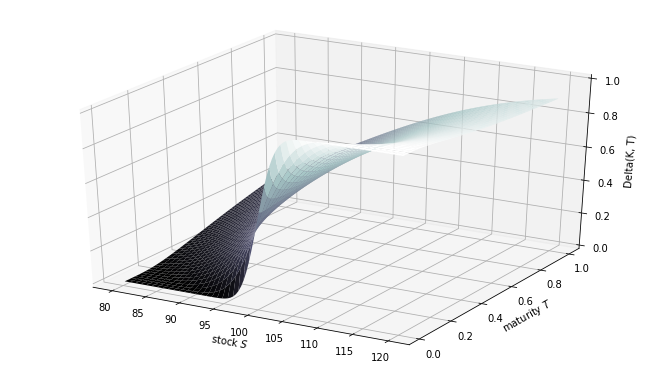

In [68]:
plot_greeks(BSM_delta,"Delta")

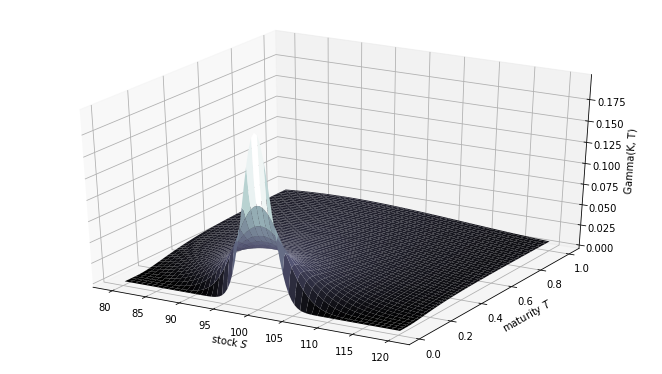

In [64]:
plot_greeks(BSM_gamma,"Gamma")

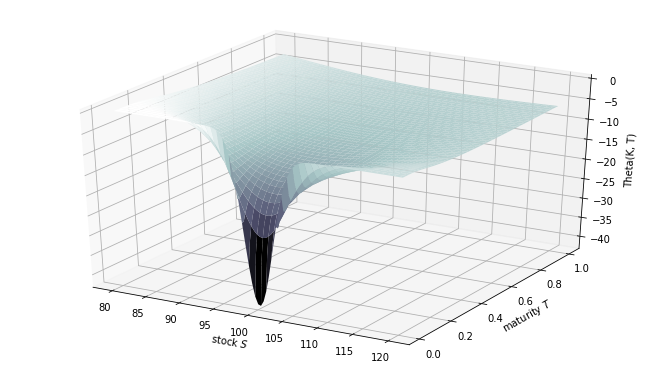

In [14]:
plot_greeks(BSM_theta,"Theta")

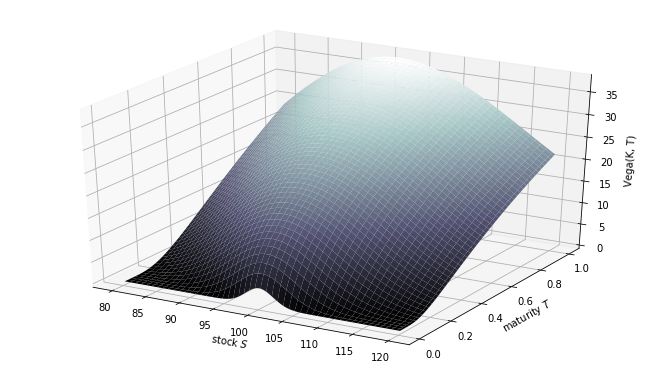

In [15]:
plot_greeks(BSM_vega,"Vega")

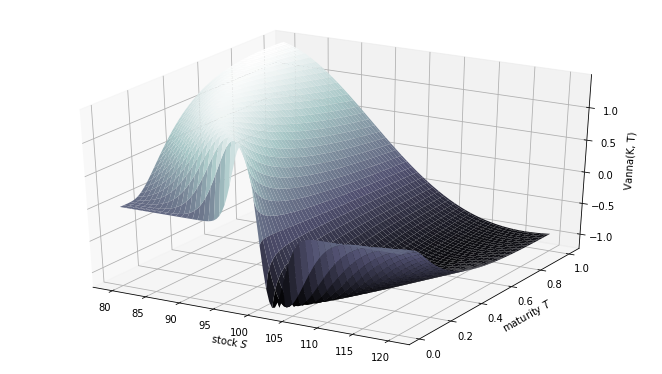

In [16]:
plot_greeks(BSM_vanna,"Vanna")

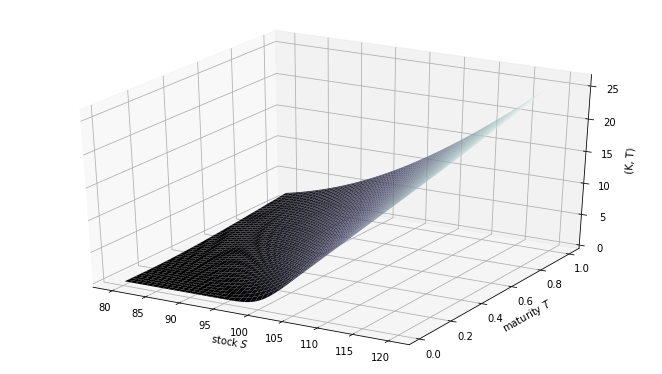

In [17]:
plot_greeks(BSM_call_value, "")

#### 固定S

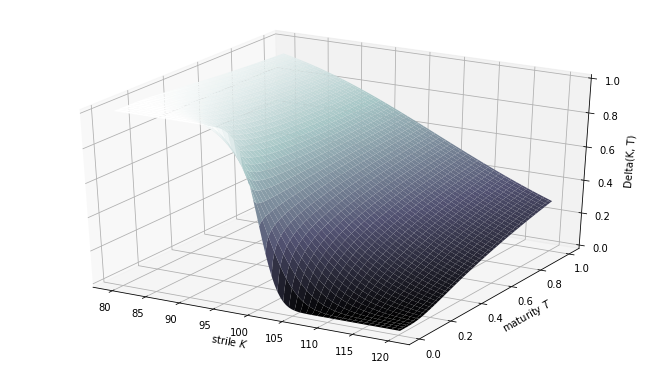

In [63]:
plot_greeks(BSM_delta,"Delta", True, False)

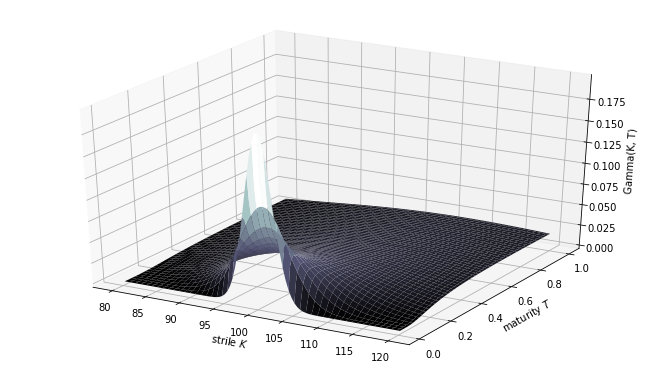

In [65]:
plot_greeks(BSM_gamma,"Gamma", True, False)

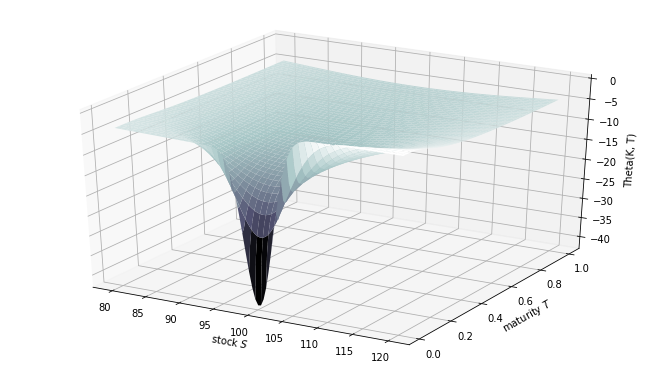

In [49]:
plot_greeks(BSM_theta,"Theta", True, False)

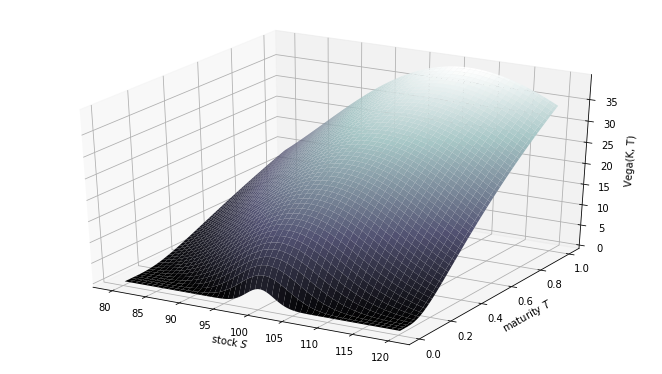

In [47]:
plot_greeks(BSM_vega,"Vega", True, False)

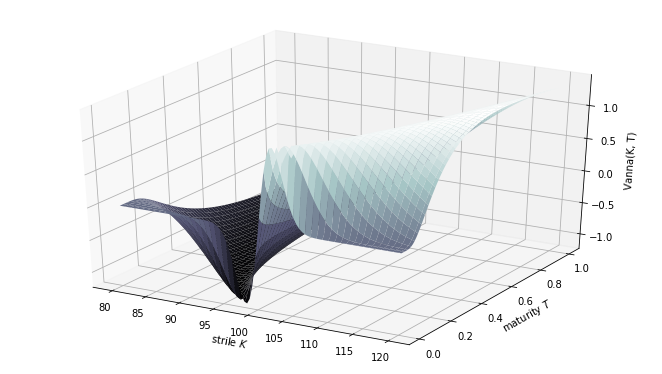

In [66]:
plot_greeks(BSM_vanna,"Vanna", True, False)

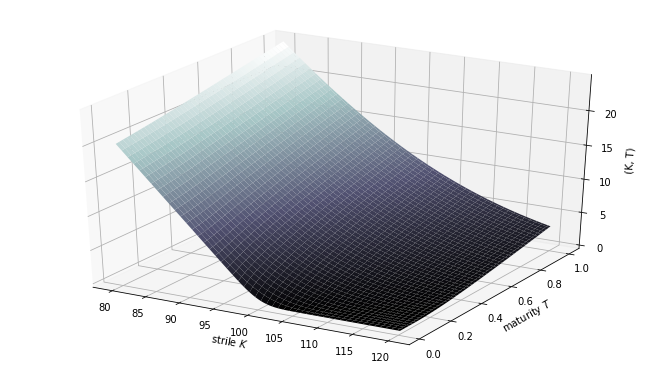

In [67]:
plot_greeks(BSM_call_value, "", True, False)

#### Find implied volatility

In [ ]:
#Newton method
def implied_vol():
    return 